In [1]:
# Super users 
# Greater than 10 unique sessions per month
# 2 video success post per month
# greater than 20 video views per month

# Regular users
# 2 profile visit 
# 10 video videos 
# 4 unique sessions per month 

# Not regular users but active users
# 3 unique sessions + 2 video views per month 

# Not active users (1 session per month)

# video_finalize__post_success
# video__seen

In [5]:
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
from flickplay.mongo import get_mongo_db_obj
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

con, conp = get_alchemy_con(), get_pymysql_con()
db = get_mongo_db_obj()

In [115]:
ds = pd.DataFrame.from_records(db.experiences.find(
  {'nft':True,'totalSocialScore': {'$gt': 1000}}
))

In [120]:
ds = ds.sort_values(by='totalSocialScore', ascending=False).iloc[:20]

In [119]:
u = pd.DataFrame.from_records(db.users.find())

In [138]:
uid_to_uname = dict()
unames = []

for idx, row in ds.iterrows():
    
    uid = row.nftOwner
    username = u[u._id==uid].username.iloc[0]
    unames.append(username)

In [148]:
ds['username'] = unames

cols = list(ds.columns)

cols.remove('username')
cols.remove('_id')

cols = ['_id','username'] + cols

cc = ['TotalSocialScore','name','nftOwner','nftOwnerWalletAddress']

ds[['username','totalSocialScore','name','nftOwner','nftOwnerWalletAddress']].to_csv('/Users/allen/Desktop/nfts_top20.csv',index=False)

In [11]:
query = '''
SELECT
    $user_id, event, count(event) event_type
FROM 
    ( select * from fpa.events where date>='2022-12-1' ) x
GROUP BY
    $user_id, event
HAVING 
    event='video_finalize__post_success' or 
    event='video__seen' or 
    event='session__start'
'''

df = pd.read_sql(query, conp)

In [12]:
df

,$user_id,event,event_type
0,6388d81871cd2d3ed78ebe97,video__seen,2
1,62452af2973d20a7a0e22b19,session__start,1
2,61ca6b5c57d2be3841dcddcc,session__start,2
3,6388f1b4a05b582445abefac,session__start,2
4,None,session__start,583
...,...,...,...
1228,63a353cabe7cd36d94716d0f,session__start,2
1229,63a353cabe7cd36d94716d0f,video__seen,8
1230,628b8ec504999f135538bfa4,video__seen,4
1231,60ca2e7dabe669076571507c,video__seen,61


In [13]:
df = pd.read_sql("SELECT * FROM fpa.events where date>='2022-12-1'", conp)

In [110]:

conp = get_pymysql_con()

query = """
SELECT event, $user_id, date, time
FROM fpa.events
WHERE 
    event like 'session%' AND
--    event='session__start' OR 
--    event='session__end' AND
    date>='2022-12-1' AND
--    date<'2022-12-1' AND
    $user_id IS NOT NULL
"""

df = pd.read_sql(query, conp).dropna()

dd=df[df.event.isin(('session__start','session__end'))].copy()
uids = list(set(dd['$user_id']))
import sys

ulengths = dict()
nuids = len(uids)

result_df = pd.DataFrame(columns=['user_id','n_sessions','avg_session_len'])

user_id_col = []
n_sessions_col = []
avg_session_len_col = []


for idx, uid in enumerate(uids):
    sys.stdout.write(f'\r{idx} of {nuids}.')
    lengths = []
    user_dd = dd[dd['$user_id'] == uid].copy()
    
    n_sessions = len(user_dd[user_dd.event=='session__end'])
    
    for idx, row in user_dd.iterrows():
        if row.event == 'session__end':
            try:
              #  if dd.iloc[idx].at['time'] > dd.iloc[idx-1].at['time'] and dd.iloc[idx-1].at['event'] == 'session__start':
                lengths.append(dd.iloc[idx].at['time']- dd.iloc[idx-1].at['time'])
            except:
                pass
        
    avg_session_len = np.average(lengths)
    ulengths[uid] = avg_session_len
    
    
#     user_id_col.append(uid)
#     n_sessions_col.append(n_sessions)
#     avg_session_len_col.append(avg_session_len)
    
# result_df['user_id'] = user_id_col
# result_df['n_sessions'] = n_sessions_col
# result_df['avg_session_len'] = avg_session_len




# import numpy as np

# np.average(lengths)

{k:round(v/60,1) for k,v in ulengths.items() if not np.isnan(v) }
# print()
# print(len(ulengths))

# ulengths

653 of 654.

{'6331fb76750f4dadd4c5fcd4': 1.1,
 '61b578704a8d90efab3ec8cb': 21.1,
 '639797f30b77e203efbc8545': 503.1,
 '62c7b6c3aaa0055f07c25a73': 4.9,
 '638e970c0b50de2c34f4a8d7': 0.1,
 '6397af0f25239c423786c6f2': 0.3,
 '638efd81d2239054cb259dc3': -139.4,
 '63985a770b77e2720ac0579a': -360.2,
 '63932ec1d88f4c5e6e4624a6': -336.7,
 '638cab281d34c840731dee22': -11.9,
 '63982153e7aea712c3baa3c6': 21.1,
 '638969d8b1bf0f80c89ac6b7': 49.3,
 '63a04e98ae06af06d0231d63': 3.8,
 '639d6840e3fbc5722e3bd6d1': 0.2,
 '62c7adc4b8deb3d981f8b8bc': 1.3,
 '62788c47c33e7d22380012e2': -637.7,
 '62fb8975efaca7a275662896': -3.8,
 '62d83818554328c126325903': 0.5,
 '609d510c4244340b2a77c83a': 4.4,
 '6389f4afb1bf0f36619e9c79': -186.8,
 '63990e9d4d521e4330592bd8': 123.3,
 '616cb1ecee0aac2935fe327b': 366.5,
 '62c1a5b0468a91108d313b4f': 2.4,
 '638d356b64e11c1c545f3b11': -64.0,
 '61c97f22e61c6359c29a7e10': 0.1,
 '638f0d8c36f10f56812eea36': -1049.3,
 '60a8b6e1feed464099079e25': 16.9,
 '63860ddd9c58b25e3f20aecd': 0.2,
 '639b4278cb75

In [106]:
conp = get_pymysql_con()

query = """
SELECT event, $user_id, date, time
FROM fpa.events
WHERE 
    event like 'session%' AND
--    event='session__start' OR 
--    event='session__end' AND
    date>='2022-11-1' AND
    date<'2022-12-1' AND
    $user_id IS NOT NULL
"""

df = pd.read_sql(query, conp).dropna()


,event,$user_id,date,time
0,session__start,62d5044122648df88a71ed06,2022-11-01,1667345945
1,session__end,62d5044122648df88a71ed06,2022-11-01,1667346054
2,session__start,62c4c7363ef7bc84a2320028,2022-11-01,1667309808
3,session__end,62c4c7363ef7bc84a2320028,2022-11-01,1667310060
4,session__start,62eae13b7d770e28147c6bd8,2022-11-01,1667293199
...,...,...,...,...
20498,session__start,62c7adc4b8deb3d981f8b8bc,2022-11-30,1669869431
20499,session__end,62c7adc4b8deb3d981f8b8bc,2022-11-30,1669869943
20500,session__start,62c7adc4b8deb3d981f8b8bc,2022-11-30,1669869950
20501,session__end,62c7adc4b8deb3d981f8b8bc,2022-11-30,1669870112


In [74]:
dd=df[df.event.isin(('session__start','session__end'))].copy()

dd.sort_values(by='$user_id')

,event,date,time,distinct_id,$ae_first_app_open_date,$app_build_number,$app_version_string,$carrier,$city,$device_id,...,reward_id,if_claimed,user_name,clip_duration_ms,clip_start_time_ms,display_avatar,have_stock,nft,state,email
256135,session__start,2022-12-07,1670435506,5df1201474236794fbe087bb,None,5843,1.78,AT&T,Los Angeles,19136D46-1C42-4A58-A446-850715BB30EF,...,None,None,None,None,None,None,None,None,None,None
154462,session__end,2022-12-04,1670210143,5df1201474236794fbe087bb,None,1,1.78,None,Chisinau,FC455C9C-75EE-482D-AD88-1986219346FD,...,None,None,None,None,None,None,None,None,None,None
154425,session__start,2022-12-04,1670210119,5df1201474236794fbe087bb,None,1,1.78,None,Chisinau,FC455C9C-75EE-482D-AD88-1986219346FD,...,None,None,None,None,None,None,None,None,None,None
154407,session__start,2022-12-04,1670210045,5df1201474236794fbe087bb,None,1,1.78,None,Chisinau,FC455C9C-75EE-482D-AD88-1986219346FD,...,None,None,None,None,None,None,None,None,None,None
154406,session__end,2022-12-04,1670210045,5df1201474236794fbe087bb,None,1,1.78,None,Chisinau,FC455C9C-75EE-482D-AD88-1986219346FD,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569796,session__start,2022-12-20,1671585356,AD5FE872-46F5-47E0-A162-367D9C45797C,None,1,1.78,None,Chisinau,AD5FE872-46F5-47E0-A162-367D9C45797C,...,None,None,None,None,None,None,None,None,None,None
571029,session__start,2022-12-20,1671584888,3977E0D9-4FF8-4F41-9AB0-BCB9CC0602F9,None,1,1.78,None,Chisinau,3977E0D9-4FF8-4F41-9AB0-BCB9CC0602F9,...,None,None,None,None,None,None,None,None,None,None
571198,session__start,2022-12-20,1671599024,7BCD2C6C-E776-4A9F-8549-0C8241772EB0,None,5981,1.78,Globe,Quezon City,7BCD2C6C-E776-4A9F-8549-0C8241772EB0,...,None,None,None,None,None,None,None,None,None,None
576411,session__start,2022-12-21,1671606448,0FBAFF9D-6948-47E0-A180-1A8CC8D88237,None,1,1.78,None,Chisinau,0FBAFF9D-6948-47E0-A180-1A8CC8D88237,...,None,None,None,None,None,None,None,None,None,None


In [36]:
ddd= dd[dd['$user_id'] == uid].copy()

from collections import Counter

c=Counter(df.event)

(c['session__start'] - c['session__end']) / c['session__start']*100

37.92074989348104

In [37]:
ddd

,event,date,time,distinct_id,$ae_first_app_open_date,$app_build_number,$app_version_string,$carrier,$city,$device_id,...,reward_id,if_claimed,user_name,clip_duration_ms,clip_start_time_ms,display_avatar,have_stock,nft,state,email
479,session__start,2022-12-01,1669876488,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
496,session__end,2022-12-01,1669876495,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
518,session__start,2022-12-01,1669876634,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
578,session__end,2022-12-01,1669876734,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
579,session__start,2022-12-01,1669876752,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571095,session__start,2022-12-20,1671582348,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
571099,session__start,2022-12-20,1671582689,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
571144,session__end,2022-12-20,1671582720,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None
571145,session__end,2022-12-20,1671582720,61fa47fd2ff48f727611855a,None,1,1.78,None,Chisinau,74110035-11AD-4567-A574-483F201E2F8E,...,None,None,None,None,None,None,None,None,None,None


In [206]:
conp = get_pymysql_con()

query="""
SELECT count(event) cnt,
-- count(distinct(wallet_address)) addresses,
event,
month FROM fpa.derived

group by month, event
having event='profile_wallet__connect_suc'
or
event='profile_wallet__disconnect_suc';"""

q = pd.read_sql(query, conp)




In [194]:
connects = q[q.event.str.endswith('_connect_suc')]
disconnects = q[q.event.str.endswith('disconnect_suc')]

len(disconnects)

9

In [195]:
con_cum = []

cume = 0

for idx, row in connects.iterrows():
    cume += row.cnt
    con_cum.append(cume)
    
connects['cum'] = con_cum


dcon_cum = []

dcume = 0

for idx, row in disconnects.iterrows():
    dcume += row.cnt
    dcon_cum.append(dcume)
    
disconnects['cum'] = dcon_cum

In [196]:
connects

,cnt,event,month,cum
0,24,profile_wallet__connect_suc,04,24
2,98,profile_wallet__connect_suc,05,122
4,219,profile_wallet__connect_suc,06,341
6,446,profile_wallet__connect_suc,07,787
8,217,profile_wallet__connect_suc,08,1004
11,286,profile_wallet__connect_suc,09,1290
12,143,profile_wallet__connect_suc,10,1433
14,184,profile_wallet__connect_suc,11,1617
17,115,profile_wallet__connect_suc,12,1732


In [197]:
wallets = pd.DataFrame()


wallets['month'] = connects.month
wallets['cum_cnt'] = np.array(connects.cum) - np.array(disconnects.cum)

wallets

,month,cum_cnt
0,04,16
2,05,63
4,06,177
6,07,377
8,08,451
11,09,617
12,10,690
14,11,802
17,12,855


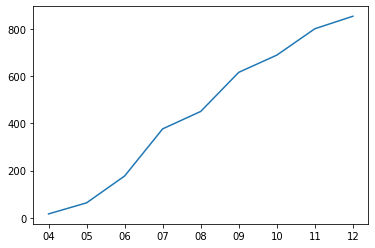

In [199]:
import matplotlib.pyplot as plt

plt.plot(wallets.month,  wallets.cum_cnt)

In [208]:
query="""
SELECT count(event) cnt,
count(distinct(wallet_address)) addresses,
event,
date FROM fpa.events

group by date, event
having event='profile_wallet__connect_suc'
or
event='profile_wallet__disconnect_suc';"""

qq = pd.read_sql(query, conp)

In [209]:
qq

,cnt,addresses,event,date
0,3,2,profile_wallet__connect_suc,2022-04-21
1,2,2,profile_wallet__disconnect_suc,2022-04-21
2,3,2,profile_wallet__connect_suc,2022-04-22
3,3,2,profile_wallet__disconnect_suc,2022-04-22
4,1,1,profile_wallet__connect_suc,2022-04-24
...,...,...,...,...
386,1,1,profile_wallet__disconnect_suc,2022-12-19
387,11,9,profile_wallet__connect_suc,2022-12-20
388,10,9,profile_wallet__disconnect_suc,2022-12-20
389,2,1,profile_wallet__connect_suc,2022-12-21
